In [65]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import qr
import itertools
from scipy.special import erfc

from Decoder import Decoder


## Sum-Product Algorithm (BP Algo)

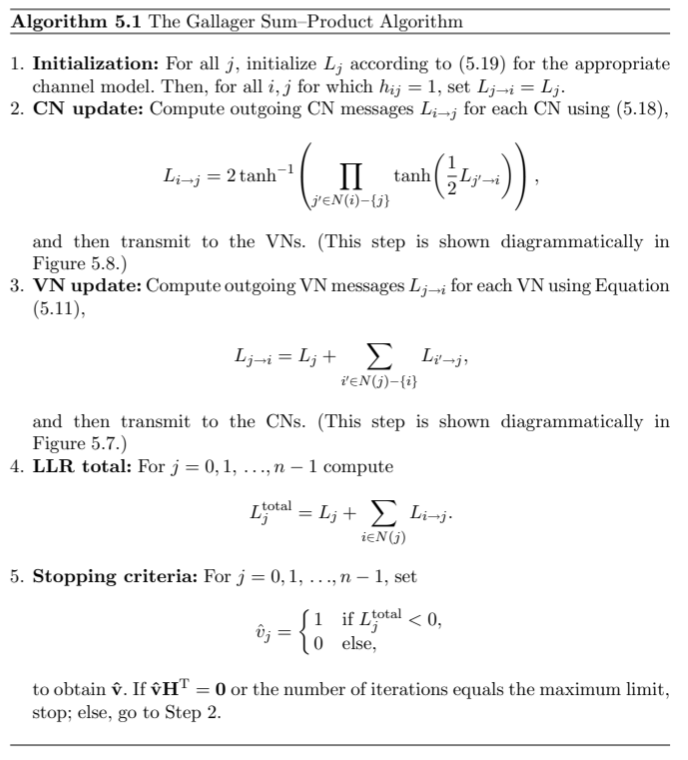


## Testing for sparse matrix $H$

In [66]:
H = np.array([
    [1,1,1,0,0,0,0,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,0,0,0,0,1,1,1],
    [1,0,0,1,0,0,1,0,0],
    [0,1,0,0,1,0,0,1,0],
    [0,0,1,0,0,1,0,0,1]
])
print("H : \n",H)


n = H.shape[1]
binary_vectors = [np.array(v) for v in itertools.product([0, 1], repeat=n)]
C = []
for c in binary_vectors:
    if np.sum(np.dot(H,c.T)%2)==0:
        C.append(c)

print("\nCodewords :")
C = np.array(C)
print(C)




H : 
 [[1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1]
 [1 0 0 1 0 0 1 0 0]
 [0 1 0 0 1 0 0 1 0]
 [0 0 1 0 0 1 0 0 1]]

Codewords :
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 1]
 [0 0 0 1 0 1 1 0 1]
 [0 0 0 1 1 0 1 1 0]
 [0 1 1 0 0 0 0 1 1]
 [0 1 1 0 1 1 0 0 0]
 [0 1 1 1 0 1 1 1 0]
 [0 1 1 1 1 0 1 0 1]
 [1 0 1 0 0 0 1 0 1]
 [1 0 1 0 1 1 1 1 0]
 [1 0 1 1 0 1 0 0 0]
 [1 0 1 1 1 0 0 1 1]
 [1 1 0 0 0 0 1 1 0]
 [1 1 0 0 1 1 1 0 1]
 [1 1 0 1 0 1 0 1 1]
 [1 1 0 1 1 0 0 0 0]]


In [67]:
channel_model = "bsc"
channel_parameters = [0.3]
num_iter = 100000
tg = Decoder(H,channel_model,channel_parameters,num_iter)
print("Tanner Graph Adjacency list")
tg.print_graph("list")

Tanner Graph Adjacency list
CN :  [[0, 1, 2], [3, 4, 5], [6, 7, 8], [0, 3, 6], [1, 4, 7], [2, 5, 8]]
VN :  [[0, 3], [0, 4], [0, 5], [1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5]]


### Actual codeword sent

In [68]:
c = C[np.random.choice(len(C))]
print("Actual Codeword : ",c)
print("H.cT = ",np.dot(c,H.T)%2)

Actual Codeword :  [1 1 0 1 1 0 0 0 0]
H.cT =  [0 0 0 0 0 0]


### Recieved codeword

In [69]:
p = channel_parameters[0]

error_array = np.random.binomial(1, p, size=len(c))
y = (c+error_array)%2
# y = np.array([1,1,0,1,0,0,0,1,0])
print("Recieved Vector : \t",np.round(y,2))
print("Error Vector :  \t",(y+c)%2)

Recieved Vector : 	 [1 0 0 1 1 0 1 1 1]
Error Vector :  	 [0 1 0 0 0 0 1 1 1]


### Decoding the recieved codeword

In [70]:
c_hat = tg.decode(y,1)

In [71]:
c_hat = [1 if val else 0 for val in c_hat]
c_hat = np.array(c_hat)%2
print("Recovered vector : \t",c_hat)
print("Dot product : \t\t",np.dot(c_hat,H.T)%2)

print("Distance between decoded and transmitted codeword : \n",(c_hat+c)%2)

Recovered vector : 	 [0 0 0 1 1 0 1 1 0]
Dot product : 		 [0 0 0 0 0 0]
Distance between decoded and transmitted codeword : 
 [1 1 0 0 0 0 1 1 0]


### Drawing Bit Error Rate vs SNR

In [72]:
def getBER(snr,H,C,num_iter,N):
    # this is for bsc, similarly do for others too
    p = 0.5*erfc(math.sqrt(snr))
    avg = 0
    tg = Decoder(H,"bsc",[p],num_iter)
    
    for i in range(N):
        c = C[np.random.choice(len(C))]
        error_array = np.random.binomial(1, p, size=len(c))
        y = (c+error_array)%2
        c_hat = tg.decode(y,1)
        c_hat = [1 if val else 0 for val in c_hat]
        c_hat = np.array(c_hat)%2
        e = np.sum((c_hat+c)%2)/len(c)
        avg = avg + e
    
    return avg/N
    

In [73]:
H = np.array( [[0,0,1,1,0,0,1,0,0,0,0,0,0,0,0]
,[1,0,0,0,1,0,0,1,0,0,0,0,0,0,0]
,[0,1,0,0,0,1,0,0,1,0,0,0,0,0,0]
,[1,0,0,0,0,1,1,0,0,0,0,0,0,0,0]
,[0,1,0,1,0,0,0,1,0,0,0,0,0,0,0]
,[0,0,1,0,1,0,0,0,1,0,0,0,0,0,0]
,[1,0,0,1,0,0,0,0,1,0,0,0,0,0,0]
,[0,1,0,0,1,0,1,0,0,0,0,0,0,0,0]
,[0,0,1,0,0,1,0,1,0,0,0,0,0,0,0]
,[1,0,0,1,0,0,1,0,0,1,0,0,1,0,0]
,[0,1,0,0,1,0,0,1,0,0,1,0,0,1,0]
,[0,0,1,0,0,1,0,0,1,0,0,1,0,0,1]],dtype=int)
n = H.shape[1]
binary_vectors = [np.array(v) for v in itertools.product([0, 1], repeat=n)]
C = []
for c in binary_vectors:
    if np.sum(np.dot(H,c.T)%2)==0:
        C.append(c)


In [74]:
snrdb_vals = []
bers = []
N = 100000
for snrdb in np.arange(0.5,2.6,0.5):
    snr = math.pow(10,snrdb/20)
    ber = getBER(snr,H,C,1000,N)
    bers.append(ber)
    print("BER : ",ber)
    snrdb_vals.append(snrdb)

KeyboardInterrupt: 

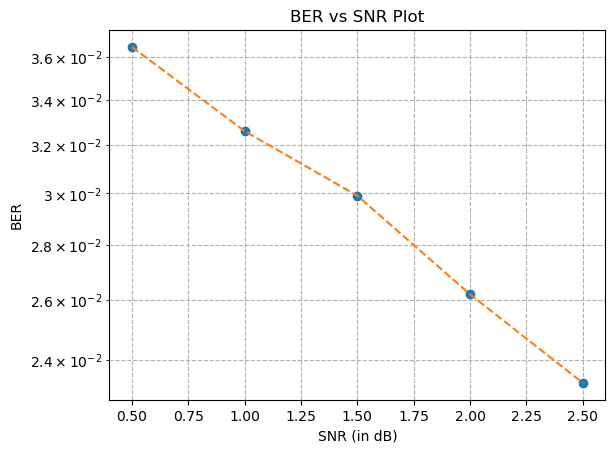

[0.0364973333333307, 0.0326086666666658, 0.029910000000000263, 0.02621333333333577, 0.023285333333337557]


In [64]:
import matplotlib.pyplot as plt

plt.plot(snrdb_vals, bers, 'o')  
plt.plot(snrdb_vals, bers, '--')

plt.title("BER vs SNR Plot")
plt.ylabel("BER")
plt.xlabel("SNR (in dB)")

plt.yscale('log')

plt.grid(True, which="both", ls="--")
plt.show()

print(bers)
